<a href="https://colab.research.google.com/github/chettkulkarni/MachineLearning/blob/master/German_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **German Data UCI**

Data Source:- [UCI Machine Learning Repo](http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/)

[More Information about Data Source
](http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29)


Source Credits:
```
Professor Dr. Hans Hofmann
Institut f"ur Statistik und "Okonometrie
Universit"at Hamburg
FB Wirtschaftswissenschaften
Von-Melle-Park 5
2000 Hamburg 13
```

About Data:
The Data has 1000 rows and 25 columns, about credit approval process

Objective Function:
***Classificy the Records a Risk Or Good Based on given features***

Steps Outline:


1.   Importing Libraries
2.   Exploratory Data Analysis
3.   Clustering : KMeans, GMM
4.   Predicting/Using Multiple Models
5.   Comparing Models
6.   Improving Model Performance Using Dimensionity Reduction
7.   Comparinging Models After PCA



# Importing Libraies

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data Load
Also updating Column names 

In [0]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric',delim_whitespace=True,header=None)
columns = [
'checking_account',
'duration',
'credit_history',
'credit_amount',
'saving_account',
'present_emp_since',
'personal_status',
'residence_since',
'property',
'age',
'inst_plans',
'num_credits',
'dependents',
'telephone',
'foreign_worker',
'new_car',
'used_car',
'Debtors_None',
'Debtors_CoApplicant',
'Rent_hose',
'Own_Hose',
'Unemployed_And_Unskilled_Non_res',
'Unskilled_resident',
'skilled_official',
'status'
]
df.columns=columns

# Data Exploraton

In [28]:
#seeing top 5 records
df.head()

,checking_account,duration,credit_history,credit_amount,saving_account,present_emp_since,personal_status,residence_since,property,age,inst_plans,num_credits,dependents,telephone,foreign_worker,new_car,used_car,Debtors_None,Debtors_CoApplicant,Rent_hose,Own_Hose,Unemployed_And_Unskilled_Non_res,Unskilled_resident,skilled_official,status
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2


In [29]:
#Seeing consise summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   checking_account                  1000 non-null   int64
 1   duration                          1000 non-null   int64
 2   credit_history                    1000 non-null   int64
 3   credit_amount                     1000 non-null   int64
 4   saving_account                    1000 non-null   int64
 5   present_emp_since                 1000 non-null   int64
 6   personal_status                   1000 non-null   int64
 7   residence_since                   1000 non-null   int64
 8   property                          1000 non-null   int64
 9   age                               1000 non-null   int64
 10  inst_plans                        1000 non-null   int64
 11  num_credits                       1000 non-null   int64
 12  dependents                        1

In [30]:
#seeing number of unique records in each column
df.nunique()

checking_account                      4
duration                             33
credit_history                        5
credit_amount                       125
saving_account                        5
present_emp_since                     5
personal_status                       4
residence_since                       4
property                              4
age                                  53
inst_plans                            3
num_credits                           4
dependents                            2
telephone                             2
foreign_worker                        2
new_car                               2
used_car                              2
Debtors_None                          2
Debtors_CoApplicant                   2
Rent_hose                             2
Own_Hose                              2
Unemployed_And_Unskilled_Non_res      2
Unskilled_resident                    2
skilled_official                      2
status                                2


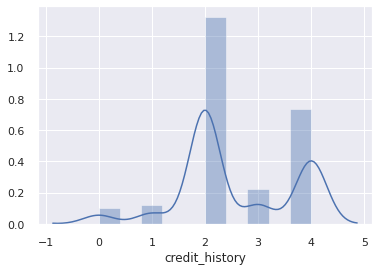

In [33]:
#distplot of Credit History to see creidit history distribution in the population of data
sns.distplot(df['credit_history']);

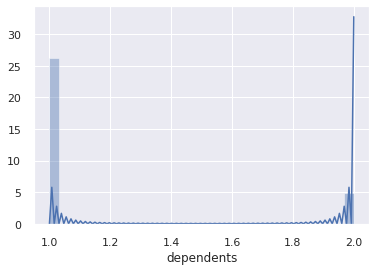

In [32]:
#distplot of dependents to see the distribution
sns.distplot(df['dependents']);

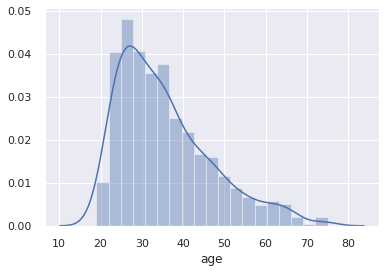

In [34]:
#distplot for age
sns.distplot(df['age']);

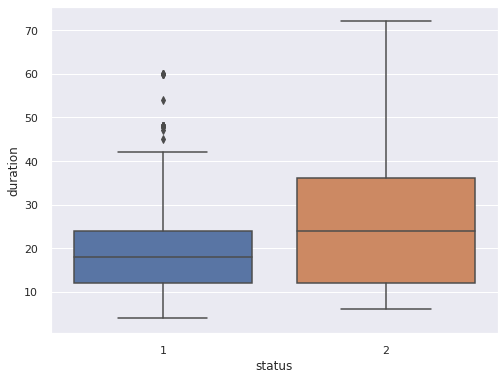

In [35]:
#Box Plot for Status vs Duration
x='status'
y='duration'
data = pd.concat([df[x], df[y]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(y=y, x=x, data=data)

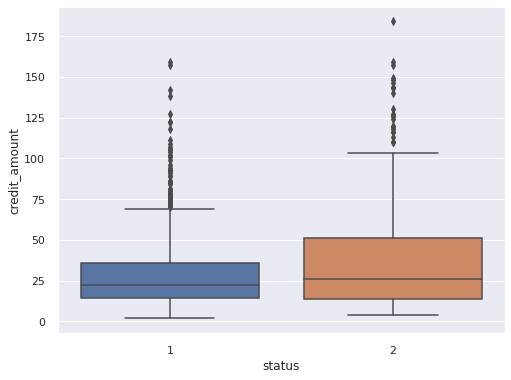

In [36]:
#boxPlot for status vs credit_amount
x='status'
y='credit_amount'
data = pd.concat([df[x], df[y]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(y=y, x=x, data=data)

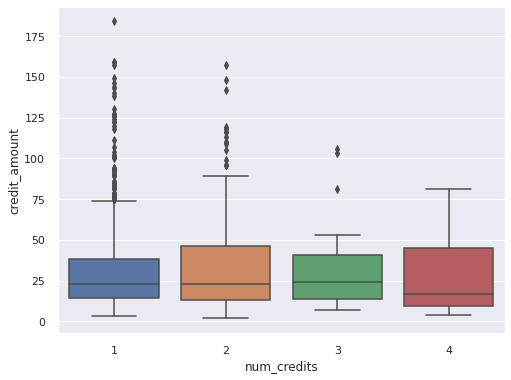

In [37]:
#box plot for num_of_credits vs credit amount
x='num_credits'
y='credit_amount'
data = pd.concat([df[x], df[y]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(y=y, x=x, data=data)

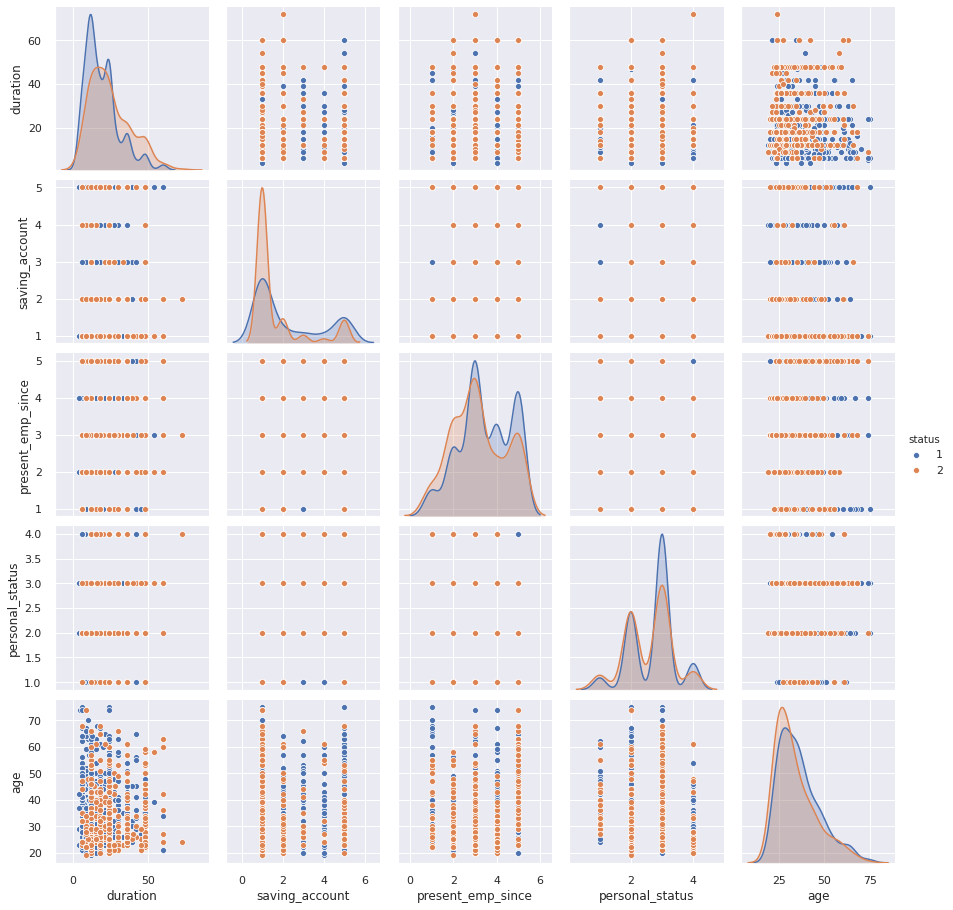

In [38]:
#pairplotting to see the relations between different feature set

sns.set()
cols = [ 'duration','saving_account', 'present_emp_since', 'personal_status', 'age', 'status']
sns.pairplot(df[cols], size = 2.5,hue='status')
plt.show();


In [0]:
#creating function to group data and returns the pd dataframe of group vs counts
def count_groups(df, group_field):
    grouped = df.groupby(group_field, as_index=False).size()
    grouped = pd.DataFrame(grouped).reset_index()
    grouped.columns = [group_field, 'Count']
    return grouped

[Text(0.5, 0, '\n Status Counts')]

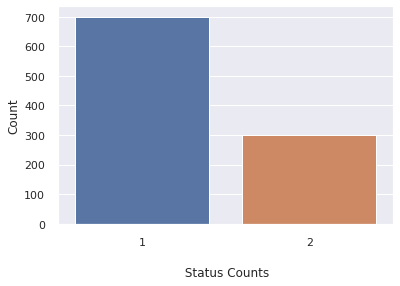

In [41]:
#seeign count distribution of status
data=count_groups(df, 'status')
sns.set()
ax = sns.barplot(data=data, x='status', y='Count')
ax.set(xlabel='\n Status Counts')

[Text(0.5, 0, '\n property Counts')]

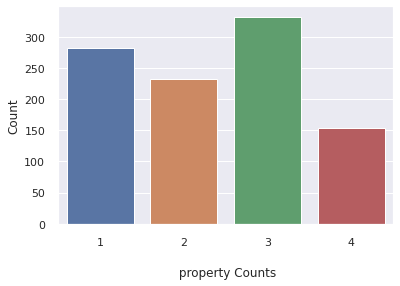

In [42]:
#seeign count distribution of property
data=count_groups(df, 'property')
sns.set()
ax = sns.barplot(data=data, x='property', y='Count')
ax.set(xlabel='\n property Counts')

[Text(0.5, 0, '\n age Counts')]

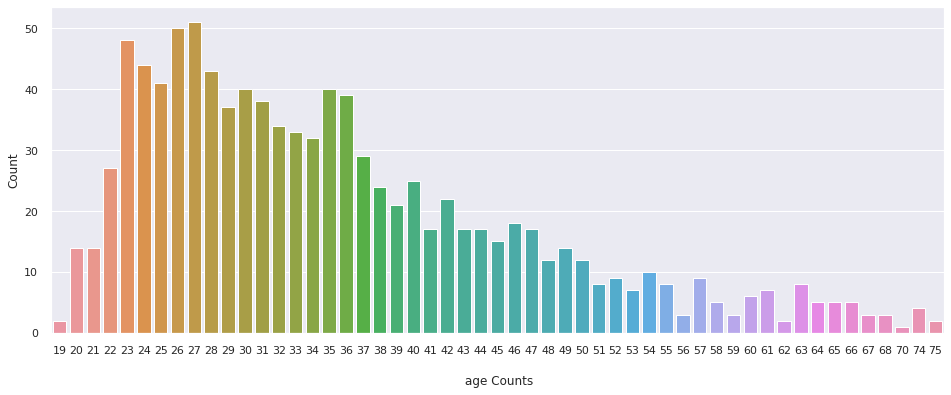

In [43]:
#seeign count distribution of age
data=count_groups(df, 'age')
sns.set()
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=data, x='age', y='Count')
ax.set(xlabel='\n age Counts')

[Text(0.5, 0, '\n duration Counts')]

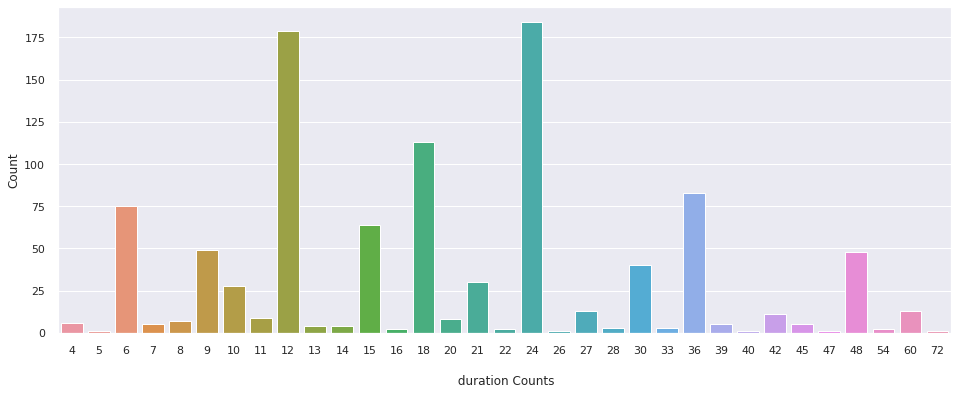

In [44]:
#seeign count distribution of duration
data=count_groups(df, 'duration')
sns.set()
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=data, x='duration', y='Count')
ax.set(xlabel='\n duration Counts')

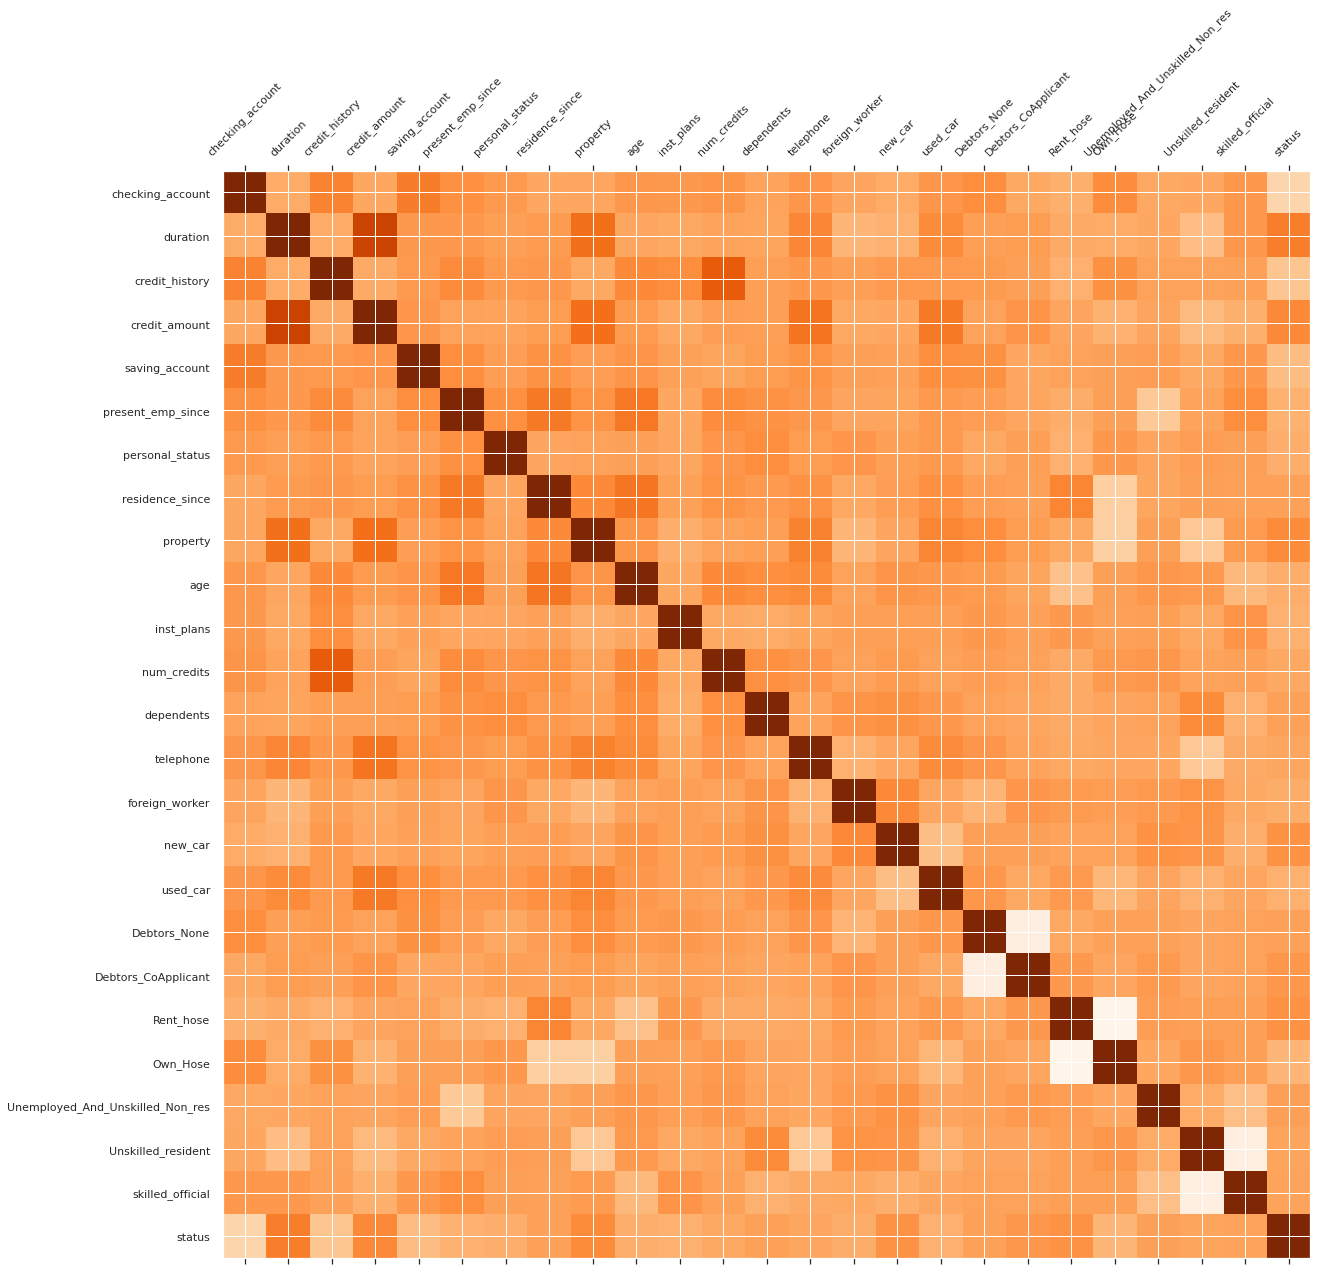

In [45]:
#plot corr matrix
def plot_corr(df,size=20):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()

plot_corr(df)

In [0]:
#decide k is the function that takes in dataset and 2 columns ,and helps draw elbow graph and silhouette score
#using these 2 graphs we can decide number of k Clusters

def decide_k(df,x_ax,y_ax,i=0):
  data = df[[x_ax,y_ax]]
  Sum_of_squared_distances = []
  K = range(1,10)
  for k in K:
      km = KMeans(n_clusters=k)
      km = km.fit(data)
      Sum_of_squared_distances.append(km.inertia_)
  #RMSE
  plt.figure(i,figsize=(7,7))
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k'+str(x_ax)+str(y_ax))
  plt.show()

  #silhouette score
  model = KMeans(random_state=0)
  plt.figure(i+2,figsize=(7,7))
  visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
  visualizer.fit(data)    
  visualizer.poof() 


#Performing Kmeans clustering and plotting the clusters formed
def plot_kmeans(df,x_ax,y_ax,i=0,n=3):
  data = df[[x_ax,y_ax]]
  kmeans = KMeans(n_clusters=n,init='k-means++')
  y = kmeans.fit_predict(data)
  plt.figure(i+1,figsize=(7,7))
  plt.scatter(df[x_ax], df[y_ax], c=kmeans.labels_, cmap='rainbow')
  plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
  plt.title('k clusters '+str(x_ax)+' vs '+str(y_ax))
  

#Performing GMM clustering and plotting the clusters formed
def plot_GMM(df,x_ax,y_ax,i=0,n=3):
  data = df[[x_ax,y_ax]]
  kmeans = GMM(n_components=n)
  y = kmeans.fit_predict(data)
  plt.figure(i+1,figsize=(7,7))
  plt.scatter(df[x_ax], df[y_ax], c=y, cmap='rainbow')
  # plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
  plt.title('GMM clusters '+str(x_ax)+'vs '+ str(y_ax))

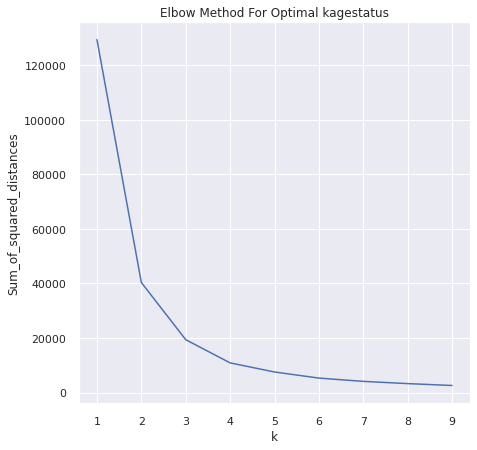

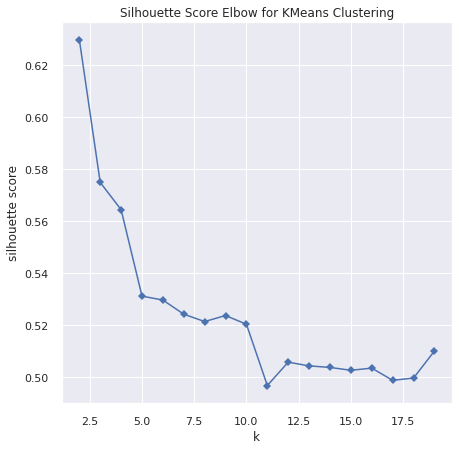

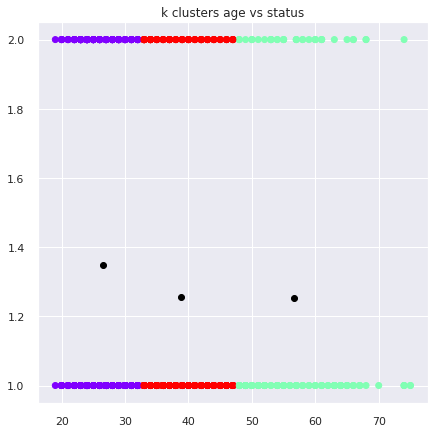

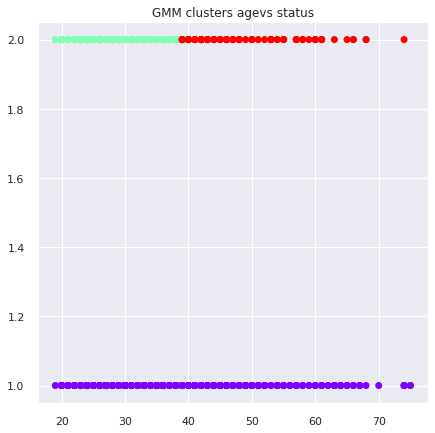

In [48]:
#perfoming Kmeans and GMM on age vs status, Optimal K from elbow graph is 3
decide_k(df,'age','status',0)
plot_kmeans(df,'age','status',n=3,i=0)
plot_GMM(df,'age','status',n=3,i=1)

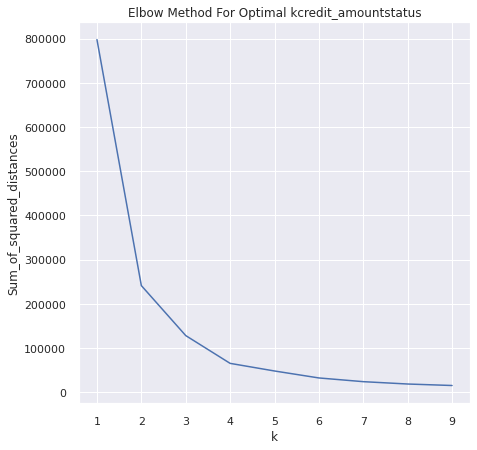

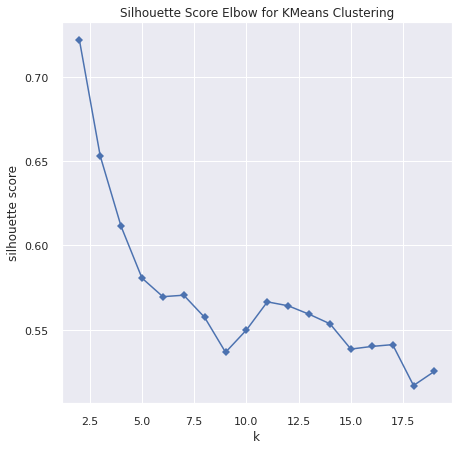

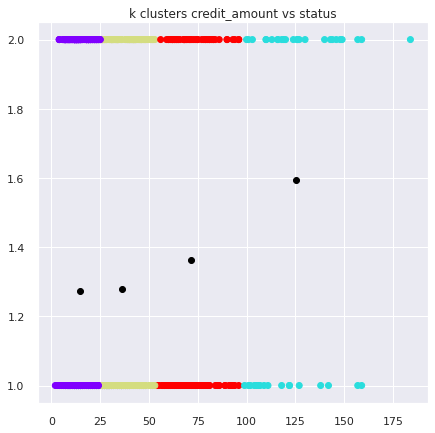

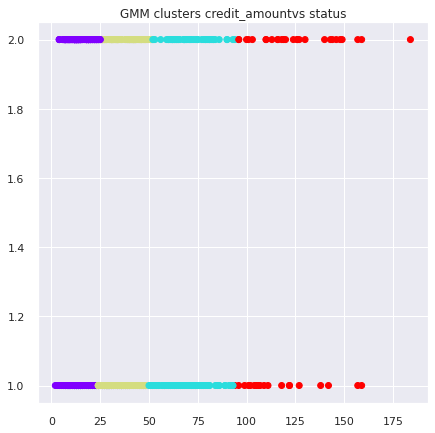

In [20]:
#perfoming Kmeans and GMM on credit_amount vs status, Optimal K from elbow graph is 4
decide_k(df,'credit_amount','status',0)
plot_kmeans(df,'credit_amount','status',n=4)
plot_GMM(df,'credit_amount','status',n=4,i=1)

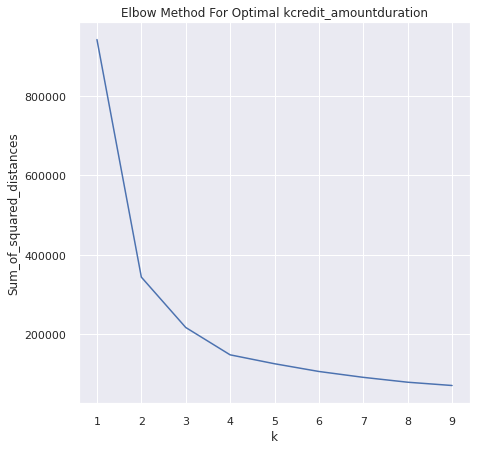

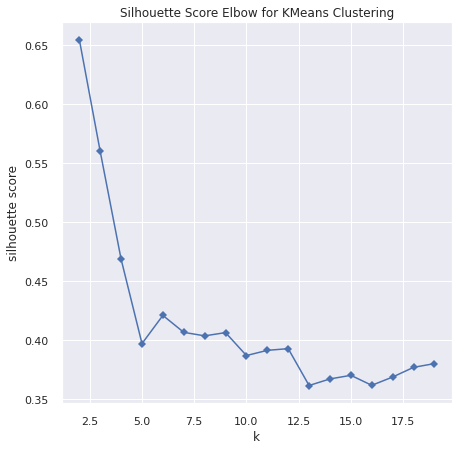

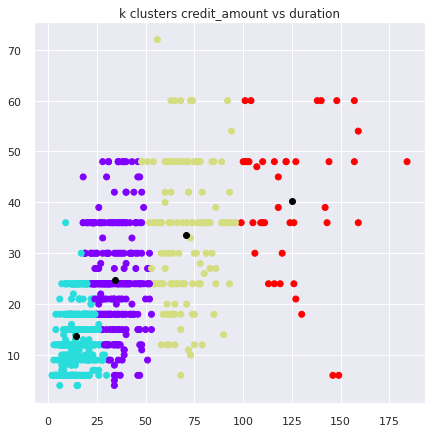

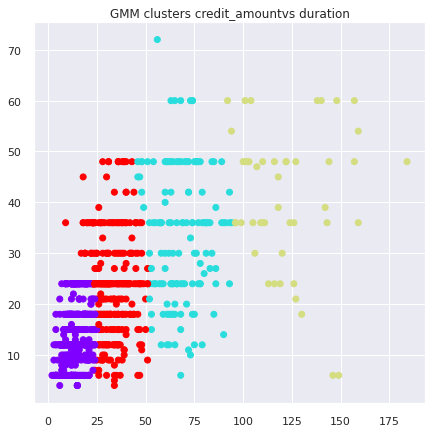

In [49]:
#perfoming Kmeans and GMM on credit_amount vs duration, Optimal K from elbow graph is 4
decide_k(df,'credit_amount','duration',0)
plot_kmeans(df,'credit_amount','duration',n=4)
plot_GMM(df,'credit_amount','duration',n=4,i=1)

In [0]:
#function to compare the different algorihths based on recall of model 
def compareAlgos(model_results):
  fig = plt.figure(figsize=(11,6))
  fig.suptitle('Algorithm Comparison')
  ax = fig.add_subplot(111)
  plt.boxplot([modelresult for name,modelresult in model_results.items()])
  ax.set_xticklabels([name for name,modelresult in model_results.items()])
  plt.show()

#writing a functional api layer which takes models , trains and tests and plots comparision of those models on a graph 
def fitModelsAndPredict(models_dict,X_train,y_train,X_test,y_test):
  accuracy={}
  specificity={}
  sensitivity={}
  #models_dict holds name and its function , like {'LR':LogsticRegression()}
  for name,model in models_dict.items():
    try:
      #fitting model on the train data
      model.fit(X_train,y_train)
      #predicting model on X_test 
      y_pred=model.predict(X_test)
      print('*'*100)
      print('Model:',name)
      #printing Confusion matrix an dAccuracy of each model
      print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
      print("Accuracy : ",accuracy_score(y_test,y_pred)*100)

      #mainitaing a dictionary of results of accuracy of each model to use it to plot in one systyem
      accuracy[name]=accuracy_score(y_test,y_pred)*100
      cm=confusion_matrix(y_test, y_pred)
      sensitivity[name] = (cm[0,0]/(cm[0,0]+cm[0,1]))*100
      specificity[name] = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
      print("Classificarion Report : ")
      print(classification_report(y_test, y_pred))
    except ValueError:
      print(name,'failed')
  
  #converting dictionaries to dataframes to have them handy
  accuracy=pd.DataFrame.from_dict(accuracy,orient='index').reset_index()
  sensitivity=pd.DataFrame.from_dict(sensitivity,orient='index').reset_index()
  specificity=pd.DataFrame.from_dict(specificity,orient='index').reset_index()
  # print(accuracy)
  accuracy.columns=['model_name','accuracy']
  sensitivity.columns=['model_name','sensitivity']
  specificity.columns=['model_name','specificity']
  
  #plotting accuracy,sensitivity,specificity of each model
  plt.figure(figsize=(16, 6))
  ax = sns.lineplot(data=accuracy, x='model_name', y='accuracy',legend='full')
  ax = sns.lineplot(data=sensitivity, x='model_name', y='sensitivity',legend='full')
  ax = sns.lineplot(data=specificity, x='model_name', y='specificity',legend='full')
  ax = sns.barplot(data=accuracy, x='model_name', y='accuracy')
  plt.title('Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')

In [0]:
#creating list of models that we will be performing on the dataet
models_dict={}
models_dict['LinearRegression']        = LinearRegression()
models_dict['LogisticRegression']        = LogisticRegression()
models_dict['Dtree']     = DecisionTreeClassifier()
models_dict['NB']        = GaussianNB()
models_dict['XGB']       = XGBClassifier()
models_dict['RForest']   = RandomForestClassifier()
models_dict['SVM']       = SVC(gamma='auto')
models_dict['KNN']       = KNeighborsClassifier()

LinearRegression failed
LogisticRegression: 0.860292 (0.106285)
Dtree: 0.703654 (0.054725)
NB: 0.697325 (0.112777)
XGB: 0.853699 (0.073154)
RForest: 0.889926 (0.056926)
SVM: 0.962490 (0.037056)
KNN: 0.820023 (0.057884)


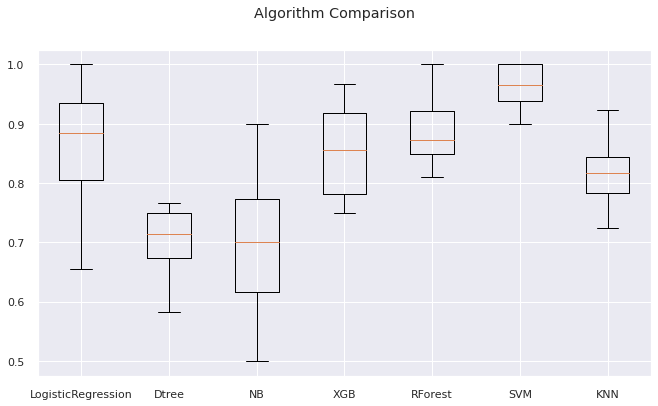

In [24]:
#X is every column other than status
#Y is column of interst , that is status

#splitting data in 80-20 distribution

X=df.loc[:,df.columns!='status']
Y=df.loc[:,df.columns=='status']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=1)

model_results={}
scoring = 'recall'
seed=1

#performing K Folds na dtestin the recall of each model, Printing recall mean and standard deviation 
kfold = KFold(n_splits=10, random_state=seed)
for name, model in models_dict.items():
  try:       
        model_results[name]=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        msg = "%s: %f (%f)" % (name, model_results[name].mean(), model_results[name].std())
        print(msg)
  except ValueError:
    print(name,'failed')
compareAlgos(model_results)

****************************************************************************************************
Model: LinearRegression
LinearRegression failed
****************************************************************************************************
Model: LogisticRegression
Confusion Matrix:  [[130  11]
 [ 34  25]]
Accuracy :  77.5
Classificarion Report : 
              precision    recall  f1-score   support

           1       0.79      0.92      0.85       141
           2       0.69      0.42      0.53        59

    accuracy                           0.78       200
   macro avg       0.74      0.67      0.69       200
weighted avg       0.76      0.78      0.76       200

****************************************************************************************************
Model: Dtree
Confusion Matrix:  [[105  36]
 [ 30  29]]
Accuracy :  67.0
Classificarion Report : 
              precision    recall  f1-score   support

           1       0.78      0.74      0.76       141
      

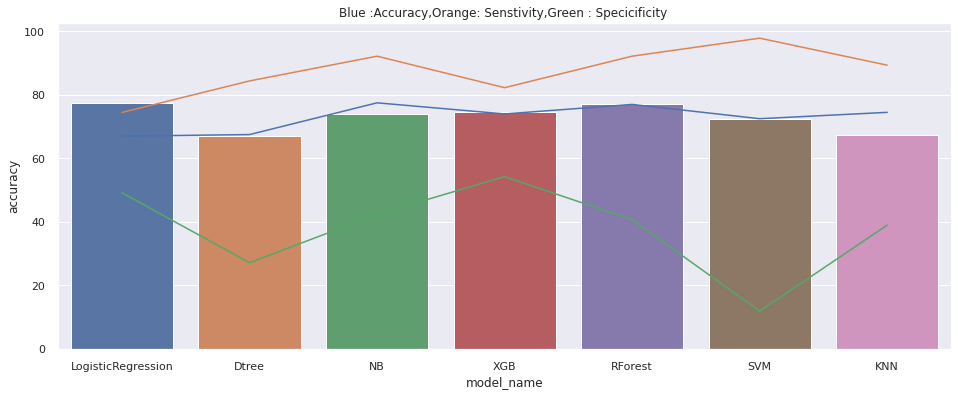

In [51]:
X=df
X=df.loc[:,df.columns!='status']
Y=df.loc[:,df.columns=='status']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

fitModelsAndPredict(models_dict,X_train,y_train,X_test,y_test)

original shape:    (1000, 24)
transformed shape: (1000, 4)
****************************************************************************************************
Model: LinearRegression
LinearRegression failed
****************************************************************************************************
Model: LogisticRegression
Confusion Matrix:  [[132   9]
 [ 35  24]]
Accuracy :  78.0
Classificarion Report : 
              precision    recall  f1-score   support

           1       0.79      0.94      0.86       141
           2       0.73      0.41      0.52        59

    accuracy                           0.78       200
   macro avg       0.76      0.67      0.69       200
weighted avg       0.77      0.78      0.76       200

****************************************************************************************************
Model: Dtree
Confusion Matrix:  [[112  29]
 [ 30  29]]
Accuracy :  70.5
Classificarion Report : 
              precision    recall  f1-score   support

 

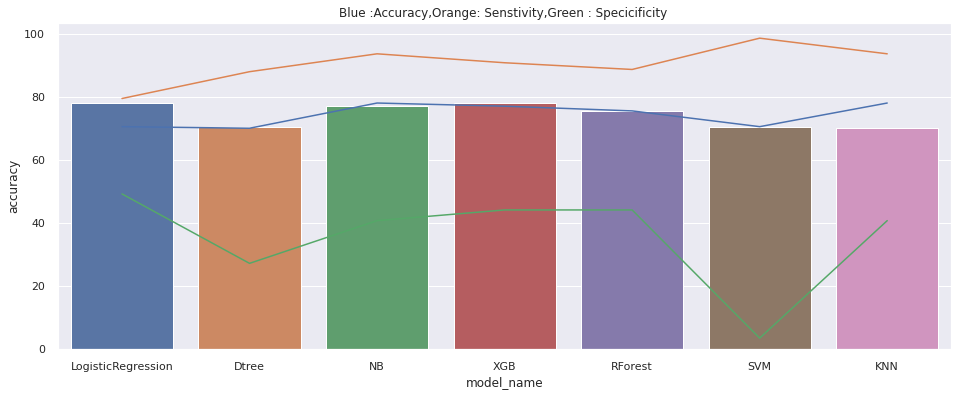

In [52]:
#performing PCA to decrease the dimensions, because more the dimensions , model underperforms ----Cure of Dimensionality

#Keeping the values of PCA which gives 99% of data information ,after that 24 columns were reduced to 4 columns
X=df.loc[:,df.columns!='status']
pca = PCA(n_components=0.99)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

#rerunning all the models again on reduced dimensions
X=pd.DataFrame(X_pca)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
fitModelsAndPredict(models_dict,X_train,y_train,X_test,y_test)

In [27]:
''' Reference Material
https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
https://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/
'''


' Reference Material\nhttps://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/\nhttps://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/\n'